# Ejercicio:

- Grafique el espacio proyectado de PCA en 2D (etiquetas e imágenes) para los atributos aprendidos por la capa de concatenación.

- Repita el proceso aplicando la técnica de reducción de dimensión [UMAP de RAPIDS](https://developer.nvidia.com/blog/even-faster-and-more-scalable-umap-on-the-gpu-with-rapids-cuml/).

- Plantee una nueva arquitectura tipo funcional utilizando capas convolucionales (Ver cuaderno [CNNs](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/3_Introduccion_CNN.ipynb)) para el entrenamiento de la base de datos Mnist-digitos, utilizando tres entradas: i) imágenes limpias, ii) y iii) imágenes con ruido blanco Gaussiano ante diferentes varianzas, y dos salidas i) estimación del digito, ii) estimación número par número impar.

# Creación de arquitecturas de aprendizaje profundo mediante API funcional de Keras.

- Se presentan los consideraciones básicas respecto a la [API funcional de Keras](https://keras.io/guides/functional_api/) para la implementación de modelos de redes profundas con TensorFlow.



In [ ]:
import tensorflow as tf #importar tensorflow
print(tf.__version__)

2.18.0


- Se utilizará la base de datos Fashion Mnist nuevamente, normalizando las imágenes de 0 a 1.

In [ ]:
train, test = tf.keras.datasets.fashion_mnist.load_data()
images, labels = train

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


- Se presenta un ejemplo de la base de datos

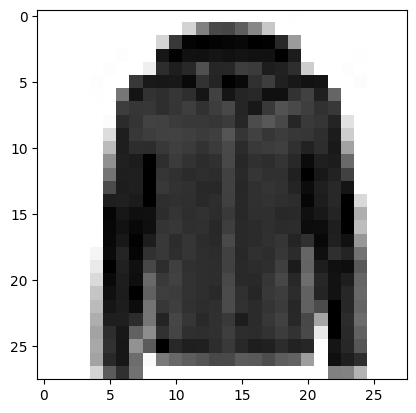

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(images[5000,:,:],cmap= 'binary')
plt.show()

In [ ]:
import numpy as np
print(np.unique(labels)) #etiquetas
print(images.shape) #tamaño de las imágenes

[0 1 2 3 4 5 6 7 8 9]
(60000, 28, 28)


In [ ]:
Xtrain, ytrain = train
Xtrain = Xtrain/255 # tipo flotante, normalizados de 0 a 1
Xtest, ytest = test
Xtest = Xtest/255 # tipo flotante, normalizados de 0 a 1

# La API funcional permite realizar conexiones más flexibles

- En el siguiente ejemplo se crea un modelo con una entrada y dos salidas con interconexiones flexibles:

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


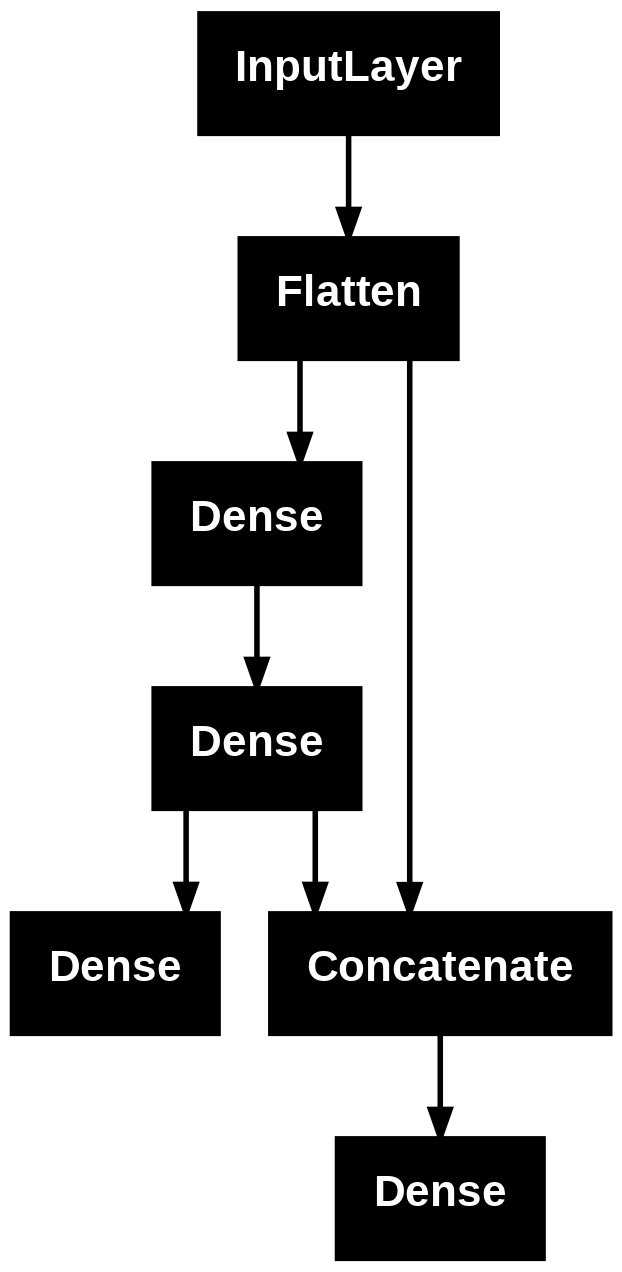

In [ ]:
#arquitectura funcional 2
tf.keras.backend.clear_session()
input_l = tf.keras.layers.Input(shape=(Xtrain.shape[1],Xtrain.shape[2]), name='entrada')
flatten = tf.keras.layers.Flatten(input_shape=(Xtrain.shape[1],Xtrain.shape[2]))(input_l)

h1 = tf.keras.layers.Dense(200,activation='tanh',name='h1')(flatten)
h2 = tf.keras.layers.Dense(50,activation='tanh',name='h2')(h1)
#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2,flatten], name="concat") # le ponemos nombre a la capa ahora
#se crean dos salidas:
output_A = tf.keras.layers.Dense(10,activation="softmax",name='outputA')(concat)#desde concatenación
output_B = tf.keras.layers.Dense(10,activation="softmax",name='outputB')(h2)#desde h2
#las entradas y salidas se ingresan como listas
model_fun = tf.keras.Model(inputs=input_l,outputs=[output_A, output_B])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun)

In [ ]:
model_fun.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ entrada             │ (None, 28, 28)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 784)       │          0 │ entrada[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h1 (Dense)          │ (None, 200)       │    157,000 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ h2 (Dense)          │ (None, 50)        │     10,050 │ h1[0][0]          │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concat              │ (None, 834)       │          0 │ h2[0][0],         │
│ (Concatenate)       │                   │            │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ outputA (Dense)     │ (None, 10)        │      8,350 │ concat[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ outputB (Dense)     │ (None, 10)        │        510 │ h2[0][0]          │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 175,910 (687.15 KB)

 Trainable params: 175,910 (687.15 KB)

 Non-trainable params: 0 (0.00 B)

**Nota**: si se cuenta con varias salidas se puede definir un mismo costo para cada salida, o una lista con los costos requeridos. Además, en la lista `loss_weights` se puede especificar el valor del peso asociado al costo de cada salida en el intervalo [0,1].

In [ ]:
model_fun.compile(loss="sparse_categorical_crossentropy", #custom_loss(),#custom_loss(),#"sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy","accuracy"]) #f1, precision, recall, crossentropy

- El entrenamiento se realiza de igual forma al utilizado con el modelo secuencial.

- Como se fijaron dos salidas, se debe ingresar una lista para los argumentos ytrain.

In [ ]:
history = model_fun.fit(Xtrain, [ytrain,ytrain] , epochs=10,batch_size=64, # 32, 64, 128, 256
                    validation_split=0.3) # se fija el conjunto de validación como el 20% del de train

Epoch 1/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 1.5001 - outputA_accuracy: 0.7268 - outputA_loss: 0.8056 - outputB_accuracy: 0.7596 - outputB_loss: 0.6945 - val_loss: 0.8604 - val_outputA_accuracy: 0.8423 - val_outputA_loss: 0.4392 - val_outputB_accuracy: 0.8480 - val_outputB_loss: 0.4201
Epoch 2/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.7963 - outputA_accuracy: 0.8538 - outputA_loss: 0.4017 - outputB_accuracy: 0.8549 - outputB_loss: 0.3946 - val_loss: 0.7994 - val_outputA_accuracy: 0.8511 - val_outputA_loss: 0.4059 - val_outputB_accuracy: 0.8566 - val_outputB_loss: 0.3932
Epoch 3/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.7192 - outputA_accuracy: 0.8682 - outputA_loss: 0.3648 - outputB_accuracy: 0.8728 - outputB_loss: 0.3544 - val_loss: 0.7025 - val_outputA_accuracy: 0.8717 - val_outputA_loss: 0.3538 - val_outputB_accuracy: 0.8729 - val_outputB_loss: 0.3476
Epoch 4/10
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.6580 - outputA_accuracy: 0.8786 

- Se presentan las curvas de desempeño:

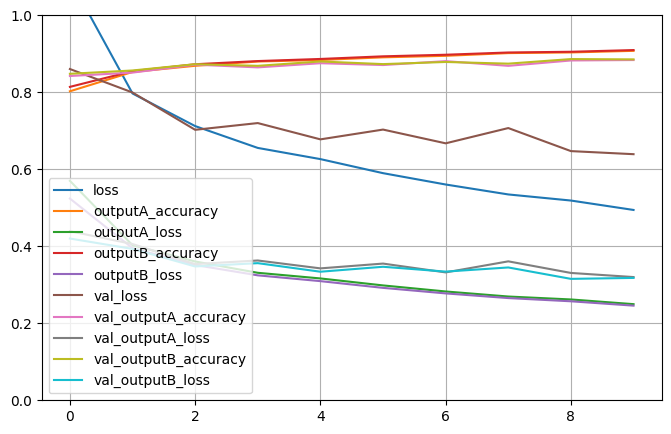

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
#save_fig("keras_learning_curves_plot")
plt.show()

- Como el modelo generado presenta dos salidas, el rendimiento se discrimina por cada salida y el acumulado.

- A la hora de predecir la salida para una nueva muestra, se debe tener en cuenta la cantidad de salidas fijadas.

In [ ]:
yestA,yestB = model_fun.predict(Xtest)
print(yestA.shape,yestB.shape)#salidas tipo 1 -K probabilidad de membresia a cada clase

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
(10000, 10) (10000, 10)


In [ ]:
print(yestA[0].argmax(),ytest[0])#para estimar la etiqueta ordinal se encuentra el max por columnas

9 9


In [ ]:
scoreA = model_fun.evaluate(Xtest,[ytest,ytest])#evaluacion
print(scoreA)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6924 - outputA_accuracy: 0.8758 - outputA_loss: 0.3463 - outputB_accuracy: 0.8754 - outputB_loss: 0.3461
[0.6920403242111206, 0.3461950123310089, 0.3450483977794647, 0.8733000159263611, 0.8740000128746033]


# Salidas parciales de la red

- La estrategia funcional nos permite acceder a partes intermedias de la red para encontrar mapas de características y verificar el aprendizaje de la representación.

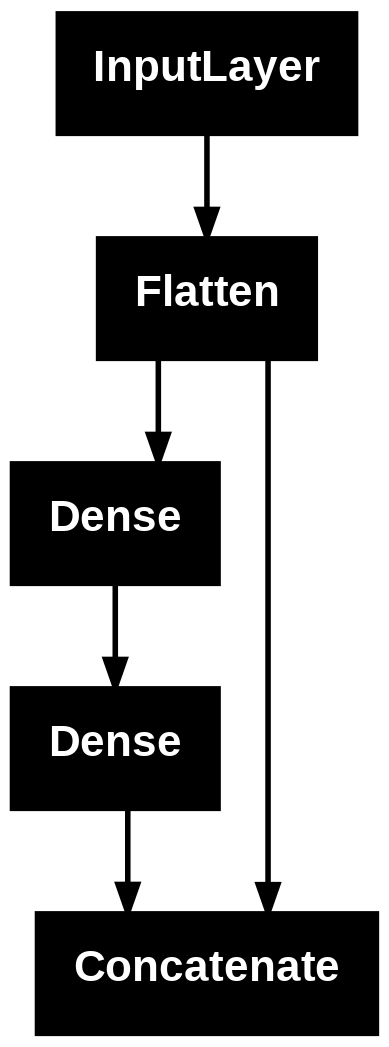

In [ ]:
#crear nuevo modelo con salida parcial
model_B = tf.keras.Model(inputs=model_fun.inputs,outputs=model_fun.get_layer('concat').output) #se accede a capas por nombre
tf.keras.utils.plot_model(model_B) # modelo ya esta ajustado!


In [ ]:
z = model_B.predict(Xtest) # salida en concat
z.shape

 39/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step   

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(32, 28, 28))
  warnings.warn(msg)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['entrada']
Received: inputs=Tensor(shape=(None, 28, 28))
  warnings.warn(msg)


(10000, 834)

### Dado que se fijaron 834 unidades, se pueden utilizar técnicas de reducción de dimensión para visualizar los patrones intermedios de la red en 2D.


# Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA
zpca = PCA(n_components=2).fit_transform(z)
zpca.shape

(10000, 2)

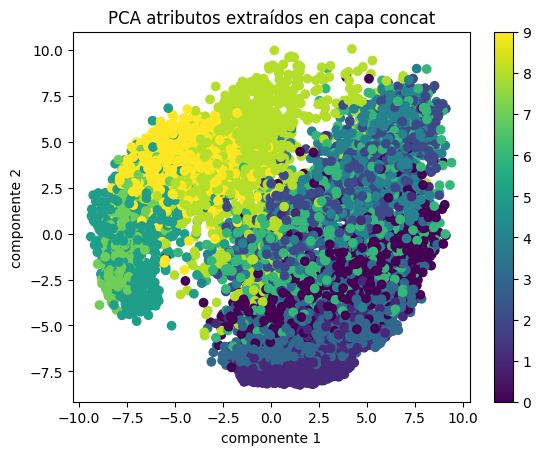

In [ ]:
plt.scatter(zpca[:,0],zpca[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa concat')
plt.show()

In [ ]:
#plot mnist 2D
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def plot_mnist_2d(Z,y,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(16,10))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

- También, podemos revisar la distribución de las imágenes en el espacio proyectado:

Text(0.5, 1.0, 'PCA atributos extraídos en capa concat')

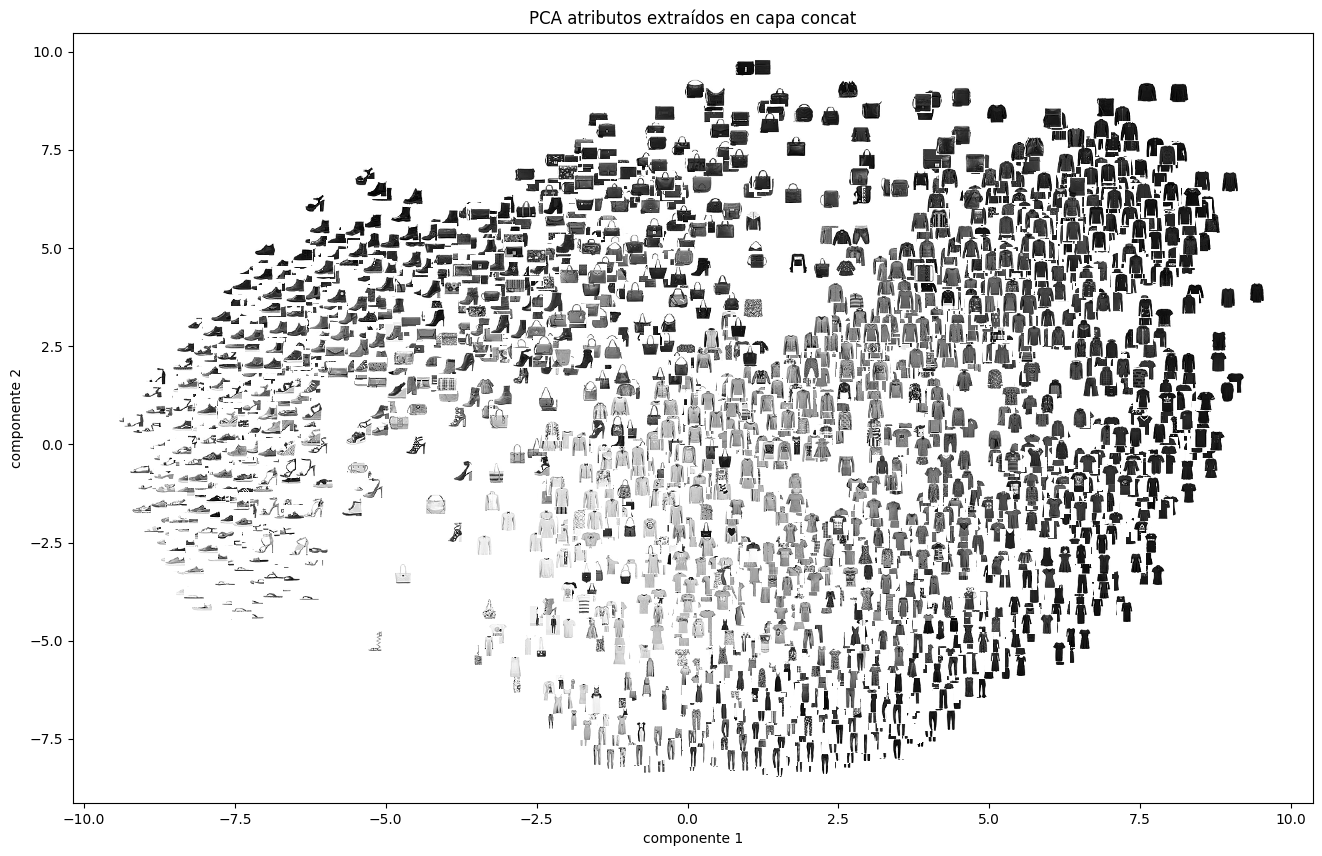

In [ ]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zpca[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('PCA atributos extraídos en capa concat')

# Ahora con UMAPS



In [ ]:
from cuml.manifold.umap import UMAP

umap = UMAP(n_neighbors=64)
zumap = umap.fit_transform(z)

[2025-06-06 00:04:07.195] [CUML] [info] Building knn graph using brute force


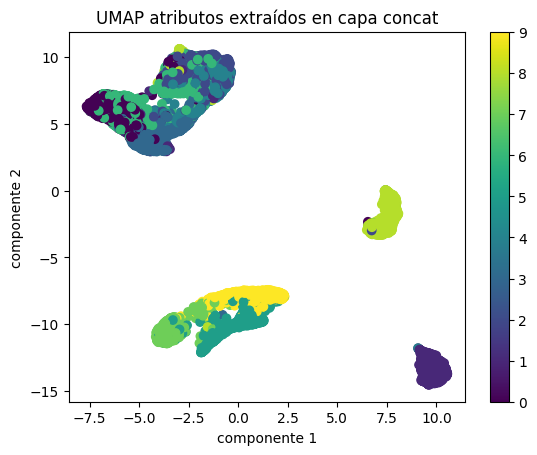

In [ ]:
plt.scatter(zumap[:,0],zumap[:,1],c=ytest)
plt.colorbar()
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('UMAP atributos extraídos en capa concat')
plt.show()

Text(0.5, 1.0, 'UMAP atributos extraídos en capa concat')

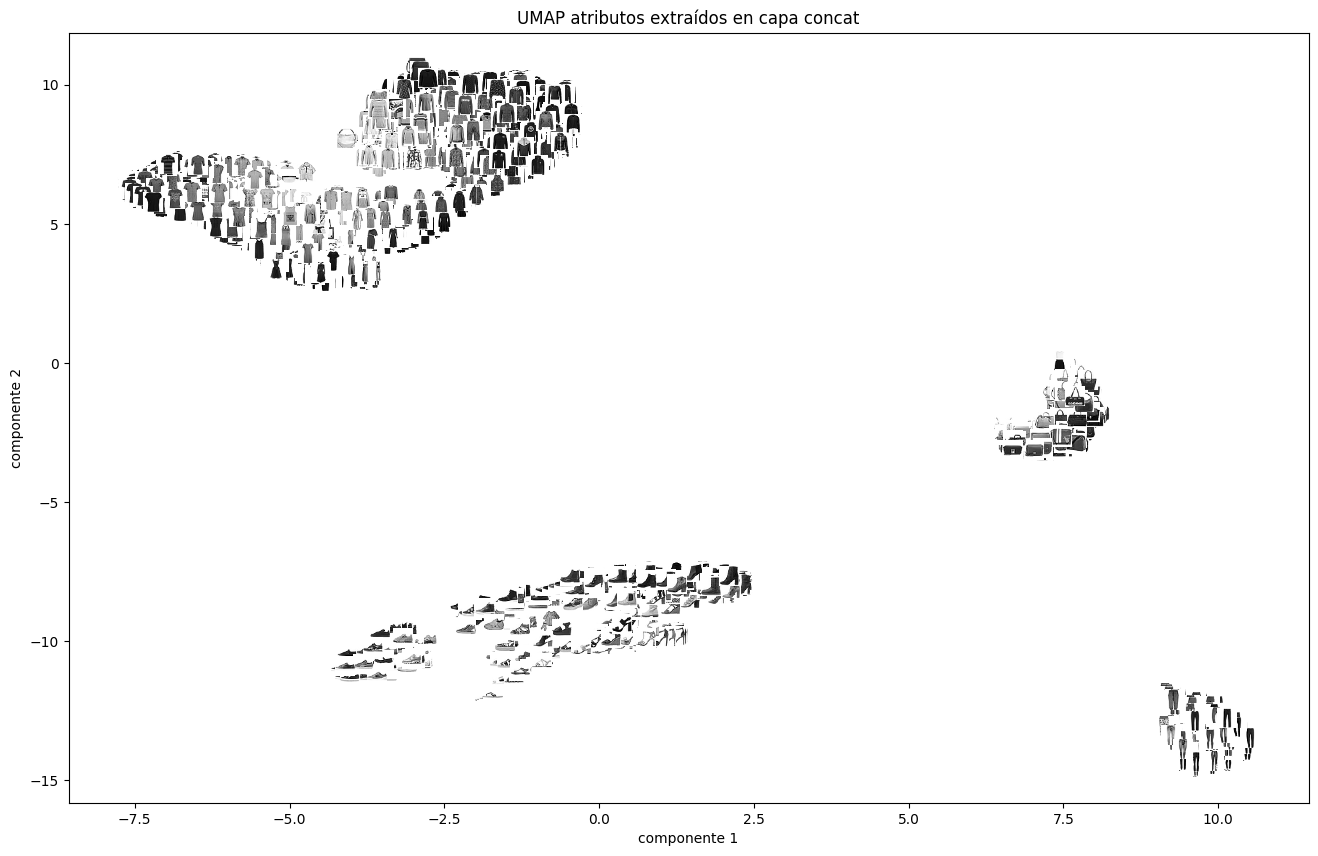

In [ ]:
Ni =4000 # graficar Ni muestras como imagenes en espacio 2D
ind = np.random.randint(0,ytest.shape[0],Ni)
plot_mnist_2d(zumap[ind],ytest[ind],Xtest[ind],img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.title('UMAP atributos extraídos en capa concat')

# Ejercicio 3

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Ayuda de código:
#cargar fashion mnist o mnist
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train, X_valid = X_train[:-55000], X_train[-55000:]
y_train, y_valid = y_train[:-55000], y_train[-55000:]

X_train = X_train[..., np.newaxis]/255.
X_valid = X_valid[..., np.newaxis]/255.
X_test = X_test[..., np.newaxis]/255.
print(X_train.shape,X_valid.shape,X_test.shape)
print(y_train.shape, y_valid.shape)

(5000, 28, 28, 1) (55000, 28, 28, 1) (10000, 28, 28, 1)
(5000,) (55000,)


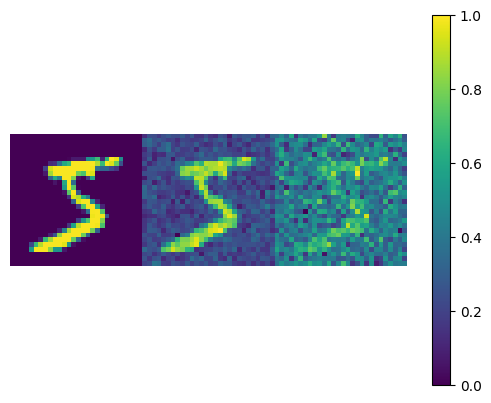

In [8]:
#crear entradas con y sin ruido
from sklearn.preprocessing import MinMaxScaler

var_ = [0.01,0.25]
inputs_train = [X_train]
inputs_valid = [X_valid]
inputs_test = [X_test]

#recorrer varianzas
for var_i in var_:
    dim = X_train.shape
    #definir ruido
    tmp = X_train + (np.sqrt(var_i)*np.random.randn(X_train.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T #fijar señal con ruido de 0 a 1
    inputs_train += [tmp.reshape(dim)]

    dim = X_valid.shape
    tmp = X_valid + (np.sqrt(var_i)*np.random.randn(X_valid.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_valid += [tmp.reshape(dim)]

    dim = X_test.shape
    tmp = X_test + (np.sqrt(var_i)*np.random.randn(X_test.shape[0],dim[1],dim[2],dim[3]))
    tmp = MinMaxScaler().fit_transform(tmp.reshape(dim[0],-1).T).T
    inputs_test += [tmp.reshape(dim)]


plt.imshow(np.c_[inputs_train[0][0,:,:,0],inputs_train[1][0,:,:,0],inputs_train[2][0,:,:,0]])
plt.axis('off')
plt.colorbar()
plt.show()

In [9]:
print([arr.shape for arr in inputs_train])

[(5000, 28, 28, 1), (5000, 28, 28, 1), (5000, 28, 28, 1)]


In [10]:
y_train_B = (y_train % 2 == 0).astype(np.int32)
y_valid_B = (y_valid % 2 == 0).astype(np.int32)
y_test_B  = (y_test  % 2 == 0).astype(np.int32)

In [11]:
print(y_train.shape)      # enteros 0–9, forma (5000,)
print(y_train_B.shape)    # 0/1 par-impar, forma (5000,)

print(y_valid.shape)      # enteros 0–9, forma (55000,)
print(y_valid_B.shape)    # 0/1 par-impar, forma (55000,)


(5000,)
(5000,)
(55000,)
(55000,)


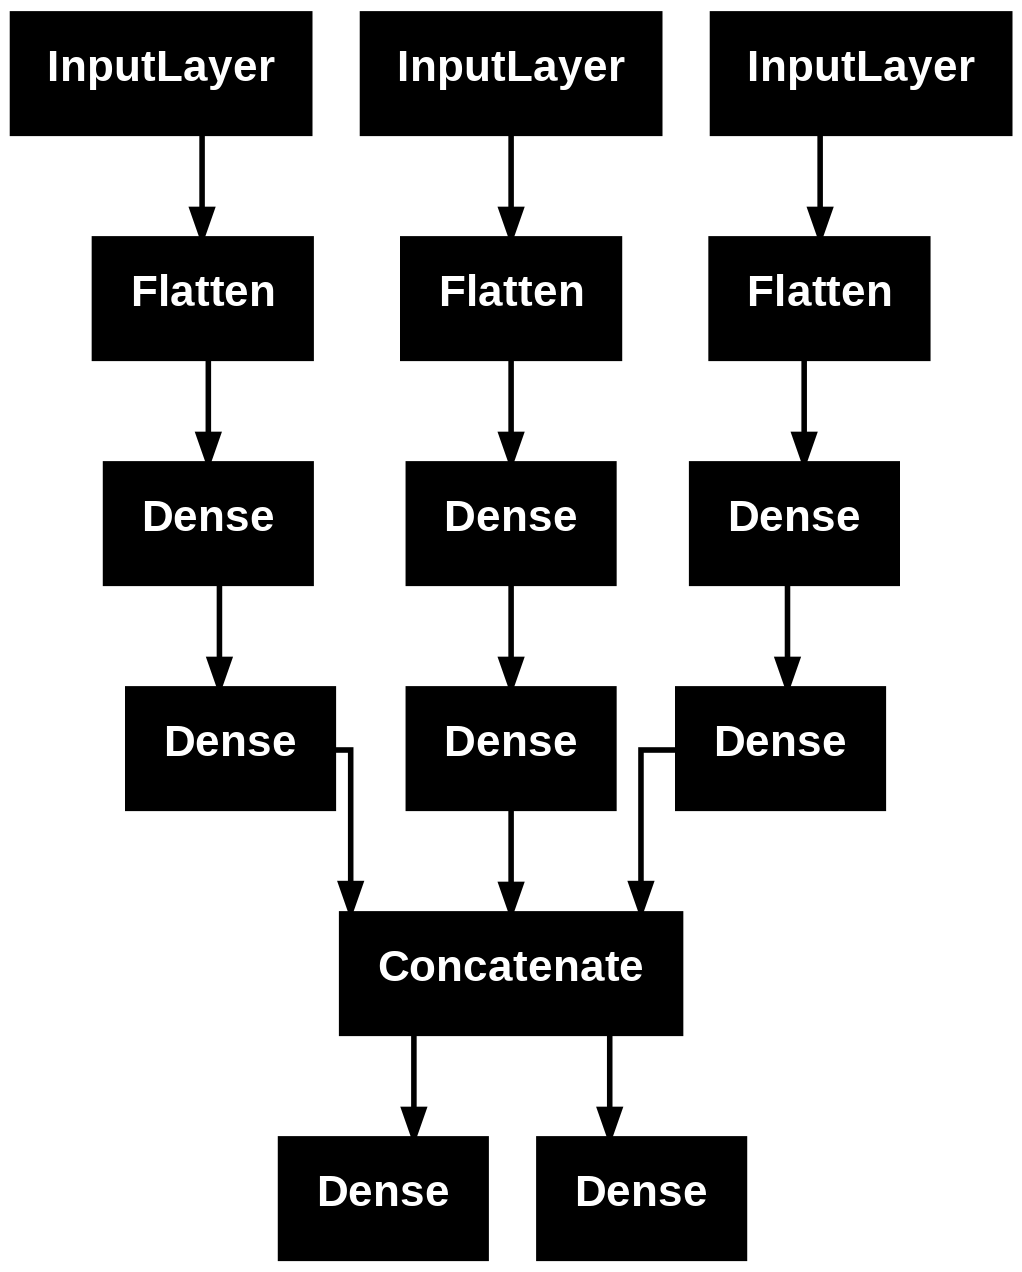

In [ ]:
#arquitectura funcional 2 - Ayuda de código con capas densas - cambiar a capas cnn
tf.keras.backend.clear_session()
input_1 = tf.keras.layers.Input(shape=(28,28,1), name='entrada_1')
input_2 = tf.keras.layers.Input(shape=(28,28,1), name='entrada_2')
input_3 = tf.keras.layers.Input(shape=(28,28,1), name='entrada_3')

flatten_1 = tf.keras.layers.Flatten()(input_1)
flatten_2 = tf.keras.layers.Flatten()(input_2)
flatten_3 = tf.keras.layers.Flatten()(input_3)

h1_1 = tf.keras.layers.Dense(200,activation='tanh',name='h1_1')(flatten_1)
h2_1 = tf.keras.layers.Dense(50,activation='tanh',name='h2_1')(h1_1)

h1_2 = tf.keras.layers.Dense(200,activation='tanh',name='h1_2')(flatten_2)
h2_2 = tf.keras.layers.Dense(50,activation='tanh',name='h2_2')(h1_2)

h1_3 = tf.keras.layers.Dense(200,activation='tanh',name='h1_3')(flatten_3)
h2_3 = tf.keras.layers.Dense(50,activation='tanh',name='h2_3')(h1_3)

#capa que concatena caracterísitacas extraídas en h2 con imágenes de entrada
concat = tf.keras.layers.concatenate([h2_1,h2_2,h2_3])
#se crean dos salidas:
output_d = tf.keras.layers.Dense(10,activation="softmax",name='output_d')(concat)#desde concatenación
output_p = tf.keras.layers.Dense(1,activation="sigmoid",name='output_p')(concat)#desde h2
#las entradas y salidas se ingresan como listas
model_fun2 = tf.keras.Model(inputs=[input_1,input_2,input_3],outputs=[output_d, output_p])
#model_fun.summary()
tf.keras.utils.plot_model(model_fun2)

In [ ]:
#Entrenar y ajustar el modelo, revisar rendimientos en cada salida

In [ ]:
# x_train es una lista de 3 arrays (cada uno con forma (5000, 28,28,1))
x_train = [ inputs_train[0], inputs_train[1], inputs_train[2] ]

# y_train debe ser lista de 2 arrays
y_train_list = [ y_train, y_train_B ]   # ambas con forma (5000,)

# x_valid es lista de 3 arrays (cada uno con forma (55000,28,28,1))
x_valid = [ inputs_valid[0], inputs_valid[1], inputs_valid[2] ]

# y_valid debe ser lista de 2 arrays (ambas con forma (55000,))
y_valid_list = [ y_valid, y_valid_B ]

In [ ]:
model_fun2.compile(
    optimizer = "nadam",
    loss      = ["sparse_categorical_crossentropy", "binary_crossentropy"],
    metrics   = ["accuracy", "accuracy"]
)

history = model_fun2.fit(
    x = x_train,
    y = y_train_list,
    epochs = 10,
    batch_size = 32,
    validation_data = (
        x_valid,
        y_valid_list
    )
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 13s 50ms/step - loss: 1.5429 - output_d_accuracy: 0.6645 - output_d_loss: 1.1308 - output_p_accuracy: 0.8089 - output_p_loss: 0.4120 - val_loss: 0.6387 - val_output_d_accuracy: 0.8905 - val_output_d_loss: 0.3873 - val_output_p_accuracy: 0.9059 - val_output_p_loss: 0.2513
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 34ms/step - loss: 0.5242 - output_d_accuracy: 0.9097 - output_d_loss: 0.3122 - output_p_accuracy: 0.9284 - output_p_loss: 0.2120 - val_loss: 0.5405 - val_output_d_accuracy: 0.8937 - val_output_d_loss: 0.3530 - val_output_p_accuracy: 0.9314 - val_output_p_loss: 0.1874
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - loss: 0.3521 - output_d_accuracy: 0.9414 - output_d_loss: 0.2209 - output_p_accuracy: 0.9580 - output_p_loss: 0.1312 - val_loss: 0.4514 - val_output_d_accuracy: 0.9121 - val_output_d_loss: 0.2941 - val_output_p_accuracy: 0.9420 - val_output_p_loss: 0.1572
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - loss: 0.25

# Conclusiones del experimento con la red densa

- **Clasificación de dígitos (10 clases)**  
  - Accuracy entrenamiento: **99.62 %**  
  - Loss entrenamiento: **0.0305**  
  - Accuracy validación: **92.66 %**  
  - Loss validación: **0.2618**

- **Clasificación par / impar (2 clases)**  
  - Accuracy entrenamiento: **99.70 %**  
  - Loss entrenamiento: **0.0173**  
  - Accuracy validación: **95.62 %**  
  - Loss validación: **0.1362**

- **Observaciones generales**  
  - El modelo entrenó sobre sólo 5000 imágenes (cada una en 3 versiones: limpia y dos ruidos), pero se evaluó en 55 000 muestras de validación.  
  - La brecha entre train y val (≈7–8 pp en dígitos, ≈4 pp en par/impar) indica que la capacidad de la red densa es limitada para generalizar con pocos datos y ruido.  
  - El entrenamiento fue estable (las curvas de loss no explotaron) y la red aprendió rápidamente patrones de paridad y dígito.

## Próximos pasos

1. **Introducir capas convolucionales (CNN)**  
   Aprovechar la estructura espacial de las imágenes para extraer características locales.  
2. **Aumentar capacidad y regularización**  
   - Añadir `Conv2D → MaxPool` antes de los bloqueos densos.  
   - Incorporar `BatchNormalization` y/o `Dropout`.  
3. **Ampliar conjunto de entrenamiento**  
   Usar más muestras originales o técnicas de data augmentation (rotaciones, desplazamientos, escalados).

Con estos cambios esperamos mejorar la generalización y elevar la accuracy de validación en la tarea de reconocimiento de dígitos.  


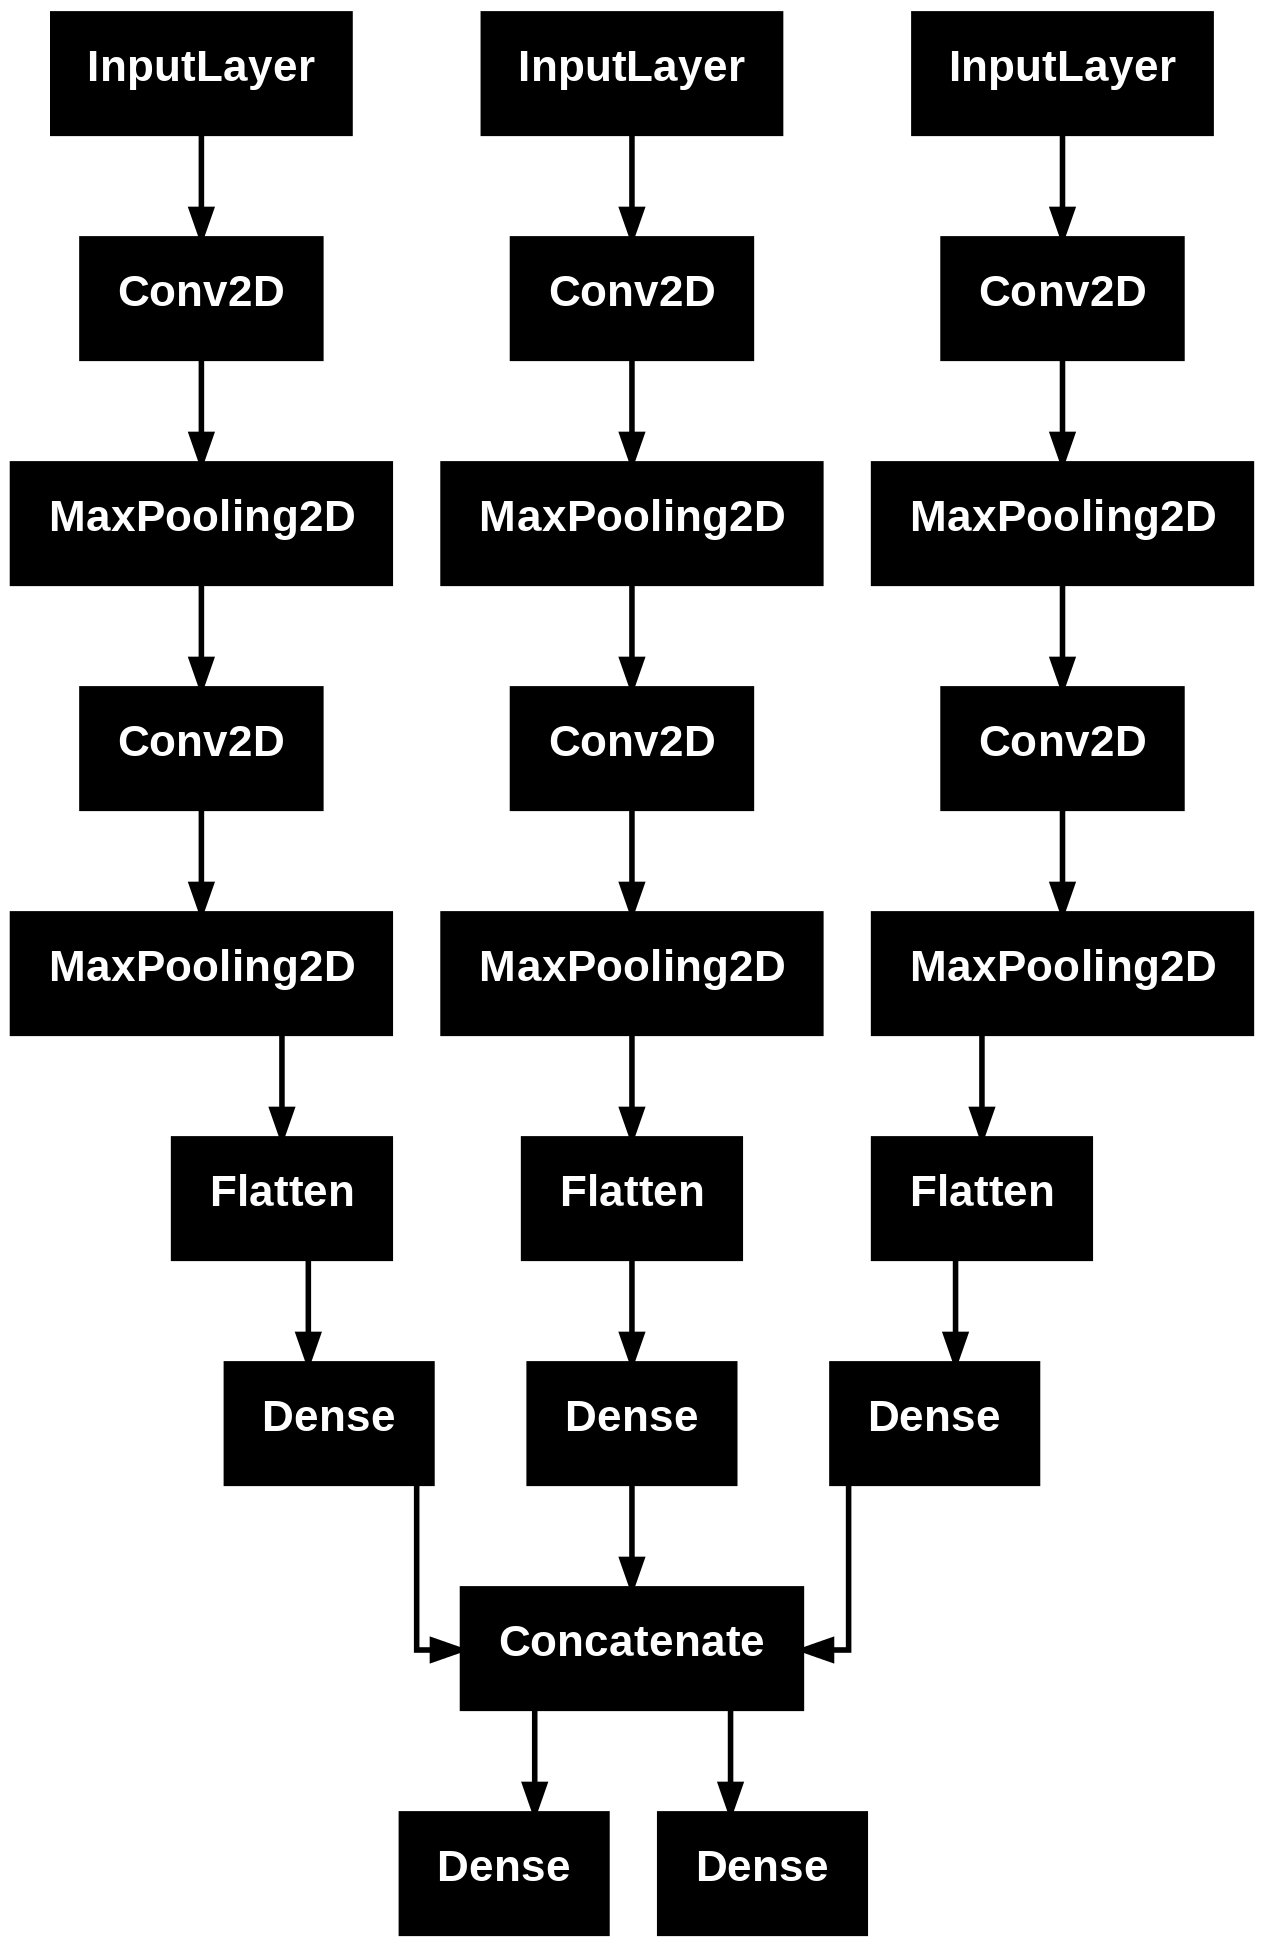

In [12]:
import tensorflow as tf

# 1) Limpiar sesión y definir Inputs
tf.keras.backend.clear_session()
input_1 = tf.keras.layers.Input(shape=(28,28,1), name='entrada_1')
input_2 = tf.keras.layers.Input(shape=(28,28,1), name='entrada_2')
input_3 = tf.keras.layers.Input(shape=(28,28,1), name='entrada_3')

def rama_cnn(x, prefijo):
    x = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same', name=f'{prefijo}_conv1')(x)
    x = tf.keras.layers.MaxPooling2D((2,2), name=f'{prefijo}_pool1')(x)
    x = tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same', name=f'{prefijo}_conv2')(x)
    x = tf.keras.layers.MaxPooling2D((2,2), name=f'{prefijo}_pool2')(x)
    x = tf.keras.layers.Flatten(name=f'{prefijo}_flatten')(x)
    x = tf.keras.layers.Dense(128, activation='relu', name=f'{prefijo}_dense1')(x)
    return x

h1 = rama_cnn(input_1, 'rama1')
h2 = rama_cnn(input_2, 'rama2')
h3 = rama_cnn(input_3, 'rama3')

concat = tf.keras.layers.concatenate([h1, h2, h3], name='concat')
output_d = tf.keras.layers.Dense(10, activation='softmax', name='output_d')(concat)
output_p = tf.keras.layers.Dense(1,  activation='sigmoid', name='output_p')(concat)

model_cnn = tf.keras.Model(
    inputs  = [input_1, input_2, input_3],
    outputs = [output_d, output_p],
    name    = 'cnn_triple_input'
)
tf.keras.utils.plot_model(model_cnn)

In [13]:
model_cnn.compile(
    optimizer = 'nadam',
    loss      = ['sparse_categorical_crossentropy', 'binary_crossentropy'],
    metrics   = ['accuracy', 'accuracy']
)
history_cnn = model_cnn.fit(
    x = [inputs_train[0], inputs_train[1], inputs_train[2]],
    y = [y_train, y_train_B],
    epochs         = 10,
    batch_size     = 32,
    validation_data=(
        [inputs_valid[0], inputs_valid[1], inputs_valid[2]],
        [y_valid,         y_valid_B]
    )
)

Epoch 1/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 24s 98ms/step - loss: 1.3982 - output_d_accuracy: 0.6727 - output_d_loss: 1.0165 - output_p_accuracy: 0.8245 - output_p_loss: 0.3818 - val_loss: 0.3744 - val_output_d_accuracy: 0.9293 - val_output_d_loss: 0.2311 - val_output_p_accuracy: 0.9459 - val_output_p_loss: 0.1433
Epoch 2/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 36ms/step - loss: 0.2759 - output_d_accuracy: 0.9484 - output_d_loss: 0.1711 - output_p_accuracy: 0.9656 - output_p_loss: 0.1048 - val_loss: 0.2191 - val_output_d_accuracy: 0.9577 - val_output_d_loss: 0.1375 - val_output_p_accuracy: 0.9712 - val_output_p_loss: 0.0816
Epoch 3/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 11s 71ms/step - loss: 0.1256 - output_d_accuracy: 0.9789 - output_d_loss: 0.0718 - output_p_accuracy: 0.9824 - output_p_loss: 0.0538 - val_loss: 0.1770 - val_output_d_accuracy: 0.9669 - val_output_d_loss: 0.1086 - val_output_p_accuracy: 0.9750 - val_output_p_loss: 0.0684
Epoch 4/10
157/157 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - loss: 0.08

## Resultados de la CNN vs. la red densa

### Validación – Clasificación de dígitos (10 clases)
- **Red densa**  
  - Accuracy val: 92.66 %  
  - Loss val: 0.2618  
- **Red CNN**  
  - Accuracy val: **97.45 %**  
  - Loss val: **0.1084**

> 🠗 Mejora de ~4.8 puntos porcentuales en accuracy y pérdida reducida a menos de la mitad.

### Validación – Clasificación par/impar (2 clases)
- **Red densa**  
  - Accuracy val: 95.62 %  
  - Loss val: 0.1362  
- **Red CNN**  
  - Accuracy val: **98.25 %**  
  - Loss val: **0.0667**

> 🠗 Mejora de ~2.6 pp en accuracy y pérdida reducida en más de un 50 %.

---

## Observaciones

- La **CNN** extrae características espaciales locales (convoluciones + pooling) antes de las capas densas, lo que le permite generalizar mucho mejor con las mismas 5 000 imágenes de entrenamiento (más sus variantes ruidosas).
- La brecha entre entrenamiento (casi 100 %) y validación (~97 % en dígitos) es razonable dada la pequeña cantidad de datos limpios.  
- La tarea de par/impar, menos compleja, también gana robustez al usar convoluciones.

---  
